# Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
# Read the data
df1 = pd.read_csv('Sales_January_2019.csv')
df2 = pd.read_csv('Sales_February_2019.csv')
df3 = pd.read_csv('Sales_March_2019.csv')
df4 = pd.read_csv('Sales_April_2019.csv')
df5 = pd.read_csv('Sales_May_2019.csv')
df6 = pd.read_csv('Sales_June_2019.csv')
df7 = pd.read_csv('Sales_July_2019.csv')
df8 = pd.read_csv('Sales_August_2019.csv')
df9 = pd.read_csv('Sales_September_2019.csv')
df10 = pd.read_csv('Sales_October_2019.csv')
df11 = pd.read_csv('Sales_November_2019.csv')
df12 = pd.read_csv('Sales_December_2019.csv')


# Merging the DATASET

In [3]:
merged_df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], axis=0)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_dataset.csv', index=False)
print("CSV files have been successfully merged and saved as 'merged_dataset.csv'")


CSV files have been successfully merged and saved as 'merged_dataset.csv'


In [4]:
# Display the first few rows and summary of the dataset
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB
None


In [5]:
print(merged_df.head())

  Order ID                   Product Quantity Ordered Price Each  \
0   141234                    iPhone                1        700   
1   141235  Lightning Charging Cable                1      14.95   
2   141236          Wired Headphones                2      11.99   
3   141237          27in FHD Monitor                1     149.99   
4   141238          Wired Headphones                1      11.99   

       Order Date                       Purchase Address  
0  01/22/19 21:25        944 Walnut St, Boston, MA 02215  
1  01/28/19 14:15       185 Maple St, Portland, OR 97035  
2  01/17/19 13:33  538 Adams St, San Francisco, CA 94016  
3  01/05/19 20:33     738 10th St, Los Angeles, CA 90001  
4  01/25/19 11:59          387 10th St, Austin, TX 73301  


In [6]:
print(merged_df.describe(include='all'))

        Order ID               Product Quantity Ordered Price Each  \
count     186305                186305           186305     186305   
unique    178438                    20               10         24   
top     Order ID  USB-C Charging Cable                1      11.95   
freq         355                 21903           168552      21903   

        Order Date  Purchase Address  
count       186305            186305  
unique      142396            140788  
top     Order Date  Purchase Address  
freq           355               355  


# Checking Missing Values with the help of Imputation

In [7]:
from sklearn.impute import SimpleImputer
# Checking missing values
missing_values = merged_df.isnull().sum()
print("Missing values before imputation:")
print(missing_values)

# Impute missing values
imputer = SimpleImputer(strategy='most_frequent')
imputed_df = pd.DataFrame(imputer.fit_transform(merged_df), columns=merged_df.columns)

Missing values before imputation:
Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64


In [8]:
# Checking missing values after imputation
missing_values_after_imputation = imputed_df.isnull().sum()
print("Missing values after imputation:")
print(missing_values_after_imputation)

Missing values after imputation:
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


# Converting Quantity Ordered and Price Each to Numeric Values

In [9]:
# Convert 'Quantity Ordered' and 'Price Each' to numeric
imputed_df['Quantity Ordered'] = pd.to_numeric(imputed_df['Quantity Ordered'], errors='coerce')
imputed_df['Price Each'] = pd.to_numeric(imputed_df['Price Each'], errors='coerce')

# Convert 'Order Date' to datetime
imputed_df['Order Date'] = pd.to_datetime(imputed_df['Order Date'], errors='coerce')

In [10]:
# Drop rows with conversion errors
imputed_df = imputed_df.dropna()

# Recheck data types and head of the cleaned dataset
print(imputed_df.info())
print(imputed_df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 9.9+ MB
None
  Order ID                   Product  Quantity Ordered  Price Each  \
0   141234                    iPhone               1.0      700.00   
1   141235  Lightning Charging Cable               1.0       14.95   
2   141236          Wired Headphones               2.0       11.99   
3   141237          27in FHD Monitor               1.0      149.99   
4   141238          Wire

# Visualize outliers using boxplot

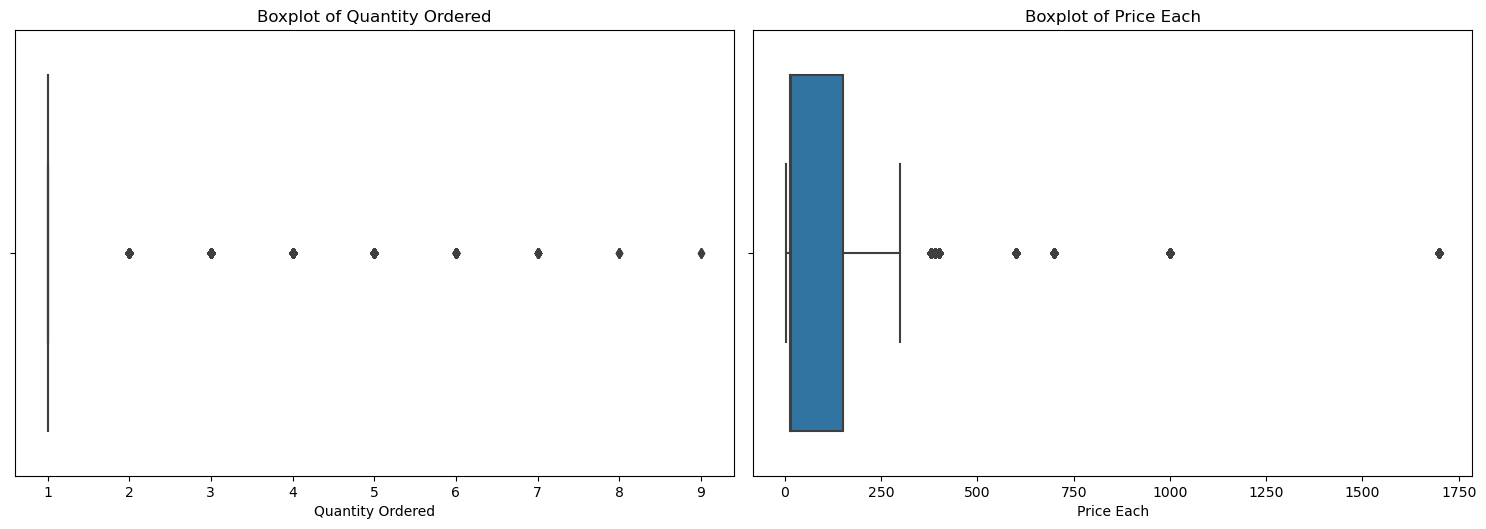

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numerical columns for boxplot visualization
numerical_columns = imputed_df.select_dtypes(include=['float64', 'int64']).columns

# Create boxplots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns)//2 + 1, 2, i)
    sns.boxplot(x=imputed_df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [12]:
# Detect and remove outliers using IQR method
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers from numerical columns
cleaned_df = remove_outliers(imputed_df, numerical_columns)

# Verify the outliers are removed
print(f"Number of rows after removing outliers: {cleaned_df.shape[0]}")

Number of rows after removing outliers: 131600


# Extract additional features from 'Order Date' and creating new column 'Total Sales'

In [13]:
imputed_df['Month'] = imputed_df['Order Date'].dt.month
imputed_df['Day of Week'] = imputed_df['Order Date'].dt.dayofweek
imputed_df['Hour'] = imputed_df['Order Date'].dt.hour

# Create 'Total Sales' column
imputed_df['Total Sales'] = imputed_df['Quantity Ordered'] * imputed_df['Price Each']

# Display the first few rows of the transformed dataset
print(imputed_df.head())

  Order ID                   Product  Quantity Ordered  Price Each  \
0   141234                    iPhone               1.0      700.00   
1   141235  Lightning Charging Cable               1.0       14.95   
2   141236          Wired Headphones               2.0       11.99   
3   141237          27in FHD Monitor               1.0      149.99   
4   141238          Wired Headphones               1.0       11.99   

           Order Date                       Purchase Address  Month  \
0 2019-01-22 21:25:00        944 Walnut St, Boston, MA 02215      1   
1 2019-01-28 14:15:00       185 Maple St, Portland, OR 97035      1   
2 2019-01-17 13:33:00  538 Adams St, San Francisco, CA 94016      1   
3 2019-01-05 20:33:00     738 10th St, Los Angeles, CA 90001      1   
4 2019-01-25 11:59:00          387 10th St, Austin, TX 73301      1   

   Day of Week  Hour  Total Sales  
0            1    21       700.00  
1            0    14        14.95  
2            3    13        23.98  
3       

# EDA

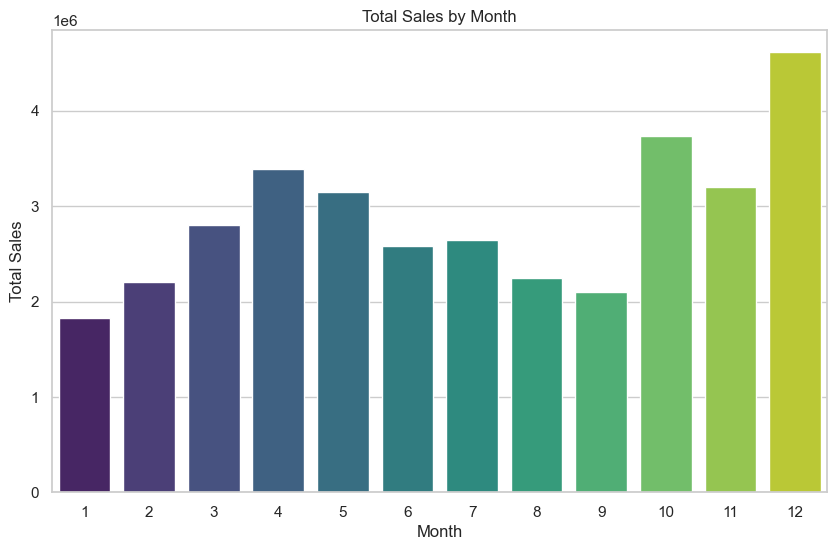

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")


# Ensure only numeric columns are included in the groupby sum
sales_by_month = imputed_df.groupby('Month')['Total Sales'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_month.index, y=sales_by_month.values, palette='viridis')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


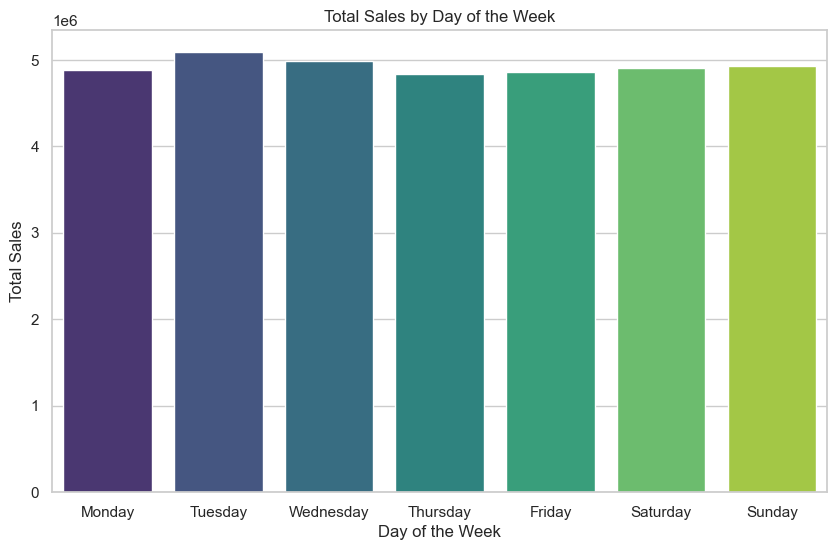

In [15]:
# Ensure only numeric columns are included in the groupby sum
sales_by_day = imputed_df.groupby('Day of Week')['Total Sales'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette='viridis')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()


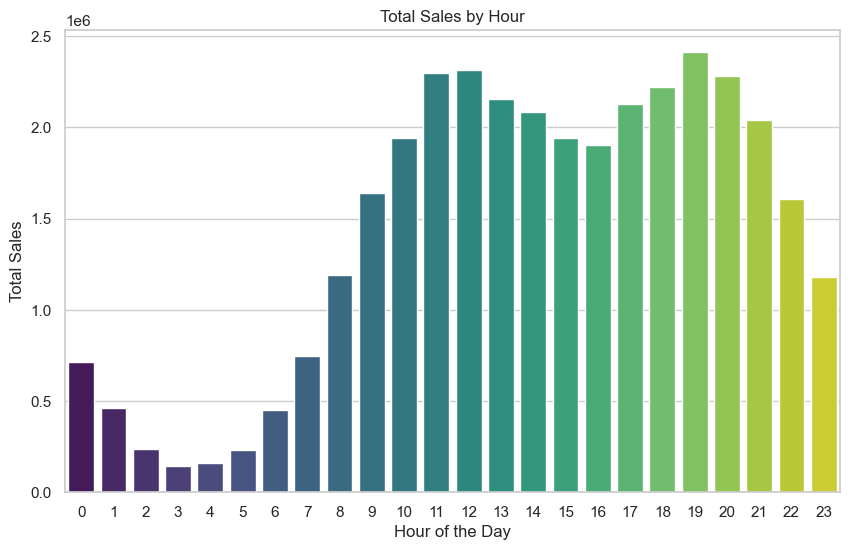

In [17]:
# Ensure only numeric columns are included in the groupby sum
sales_by_hour = imputed_df.groupby('Hour')['Total Sales'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_hour.index, y=sales_by_hour.values, palette='viridis')
plt.title('Total Sales by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.show()


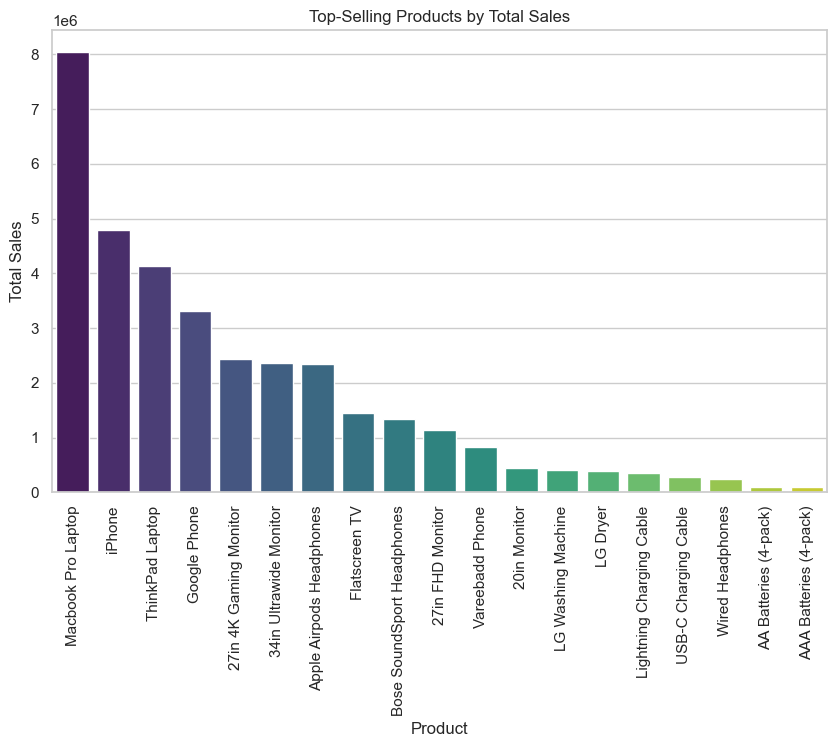

In [18]:
# Top-Selling Products by Total Sales
top_products_by_sales = imputed_df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products_by_sales.index, y=top_products_by_sales.values, palette='viridis')
plt.title('Top-Selling Products by Total Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()


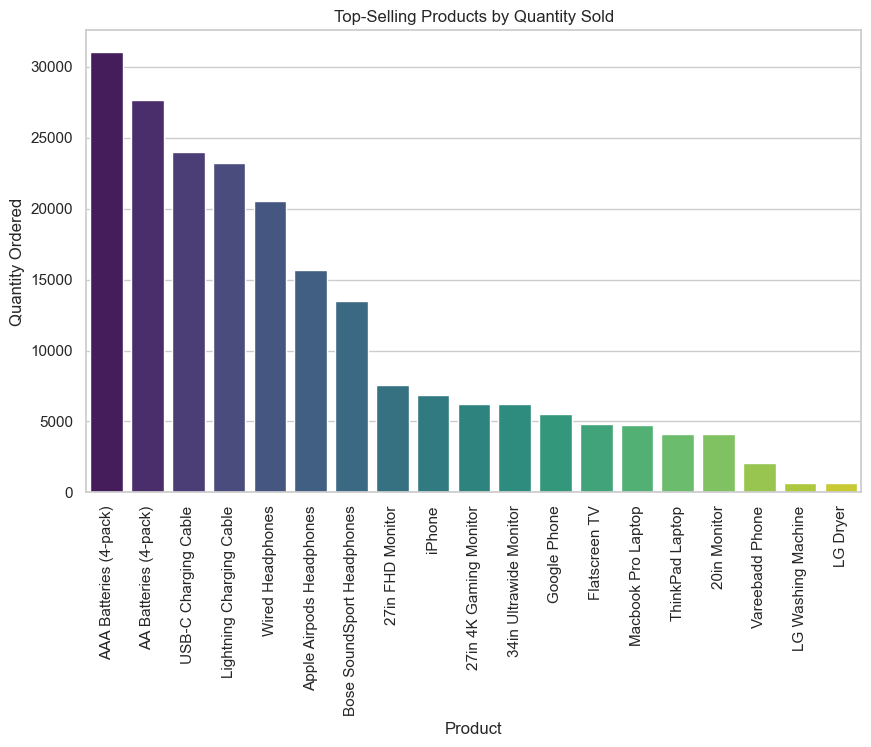

In [19]:
# Top-Selling Products by Quantity Sold
top_products_by_quantity = imputed_df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products_by_quantity.index, y=top_products_by_quantity.values, palette='viridis')
plt.title('Top-Selling Products by Quantity Sold')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=90)
plt.show()

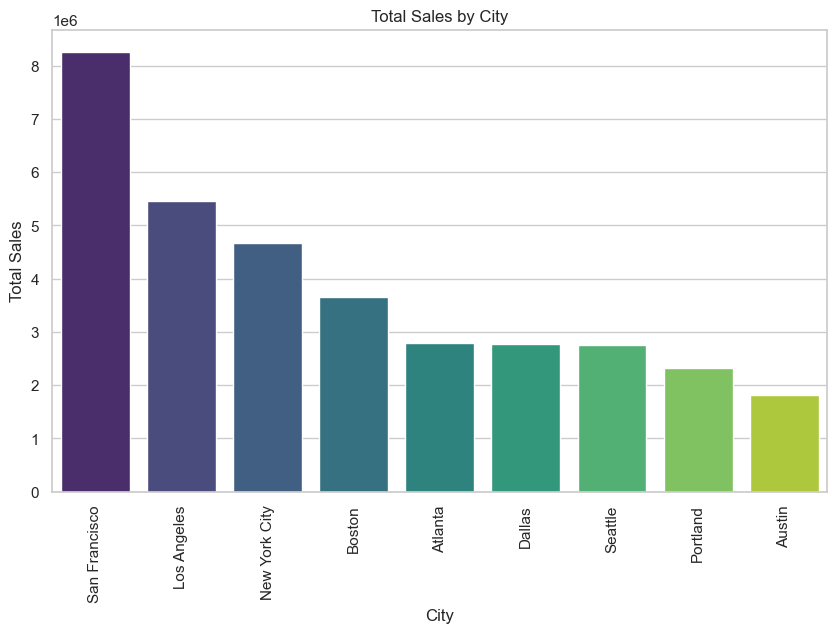

In [20]:
# Extract City from 'Purchase Address'
imputed_df['City'] = imputed_df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())

# Sales by City
sales_by_city = imputed_df.groupby('City')['Total Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_city.index, y=sales_by_city.values, palette='viridis')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

# Using labelEncoder to encode categorical columns like product and purchase address

In [21]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['Product', 'Purchase Address']

# Apply label encoding to each column using .loc
for col in categorical_columns:
    imputed_df.loc[:, col] = label_encoder.fit_transform(imputed_df[col])

# Verify the encoding
print(imputed_df.head())

C:\Users\DELL\AppData\Local\Temp\ipykernel_8420\508042125.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  imputed_df.loc[:, col] = label_encoder.fit_transform(imputed_df[col])


  Order ID  Product  Quantity Ordered  Price Each          Order Date  \
0   141234       18               1.0      700.00 2019-01-22 21:25:00   
1   141235       12               1.0       14.95 2019-01-28 14:15:00   
2   141236       17               2.0       11.99 2019-01-17 13:33:00   
3   141237        2               1.0      149.99 2019-01-05 20:33:00   
4   141238       17               1.0       11.99 2019-01-25 11:59:00   

   Purchase Address  Month  Day of Week  Hour  Total Sales           City  
0            132266      1            1    21       700.00         Boston  
1             13519      1            0    14        14.95       Portland  
2             68669      1            3    13        23.98  San Francisco  
3             99824      1            5    20       149.99    Los Angeles  
4             44894      1            4    11        11.99         Austin  


C:\Users\DELL\AppData\Local\Temp\ipykernel_8420\508042125.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  imputed_df.loc[:, col] = label_encoder.fit_transform(imputed_df[col])


# Calculating Correlation Matrix

In [22]:
correlation_matrix = imputed_df.corr()
print(correlation_matrix)

                   Product  Quantity Ordered  Price Each  Purchase Address  \
Product           1.000000         -0.114337    0.136151          0.000079   
Quantity Ordered -0.114337          1.000000   -0.148272          0.000542   
Price Each        0.136151         -0.148272    1.000000          0.004859   
Purchase Address  0.000079          0.000542    0.004859          1.000000   
Month            -0.002564          0.000791   -0.003375          0.000856   
Day of Week      -0.001329         -0.005114   -0.000451         -0.000258   
Hour             -0.002811         -0.002218    0.001721          0.000925   
Total Sales       0.135899         -0.139417    0.999203          0.004955   

                     Month  Day of Week      Hour  Total Sales  
Product          -0.002564    -0.001329 -0.002811     0.135899  
Quantity Ordered  0.000791    -0.005114 -0.002218    -0.139417  
Price Each       -0.003375    -0.000451  0.001721     0.999203  
Purchase Address  0.000856    -0.0002

C:\Users\DELL\AppData\Local\Temp\ipykernel_8420\2360268836.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = imputed_df.corr()


# Visualizing our heatmap

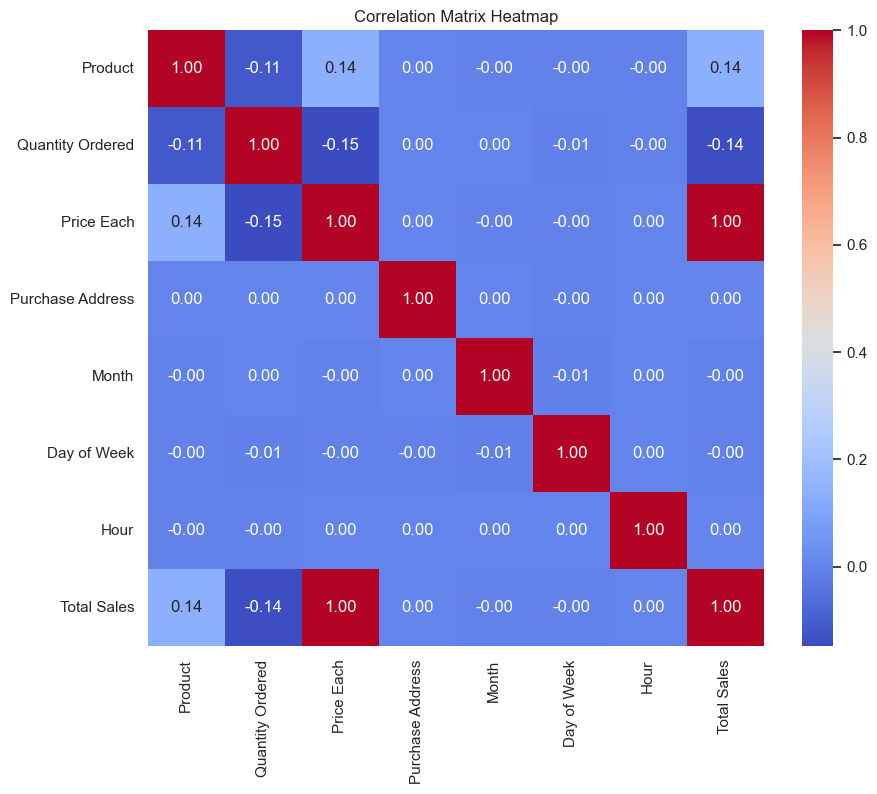

In [23]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Market Basket Analysis using Apriori Algorithm with Lower Minimum Support

In [24]:
from mlxtend.frequent_patterns import apriori, association_rules

# Prepare the data for market basket analysis
basket = imputed_df.groupby(['Order ID', 'Product'])['Quantity Ordered'].sum().unstack().reset_index().fillna(0).set_index('Order ID')

# Convert values to boolean type
basket = basket.applymap(lambda x: x >= 1)

# Apply apriori algorithm with a lower min_support
frequent_itemsets = apriori(basket, min_support=0.005, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display top 10 rules
print(rules.sort_values('lift', ascending=False).head(10))


  antecedents consequents  antecedent support  consequent support   support  \
0         (9)        (15)            0.030946            0.122480  0.005587   
1        (15)         (9)            0.122480            0.030946  0.005587   
2        (18)        (12)            0.038333            0.121074  0.005666   
3        (12)        (18)            0.121074            0.038333  0.005666   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.180551  1.474120  0.001797    1.070865       0.331900  
1    0.045619  1.474120  0.001797    1.015374       0.366521  
2    0.147807  1.220804  0.001025    1.031370       0.188077  
3    0.046797  1.220804  0.001025    1.008880       0.205782  


# Antecedent: Item 9

Consequent: Item 15
What it means: When customers buy item 9, there's a 18% chance they'll also buy item 15.
Why it's important: This shows that item 9 and item 15 are somewhat related in customers' minds. If we promote or display them together, we might increase sales of both.

# Antecedent: Item 18

Consequent: Item 12
What it means: When customers buy item 18, there's a 15% chance they'll also buy item 12.
Why it's important: Knowing this relationship can help us arrange our store layout or create promotions that encourage customers to buy both items together.

# Data Preparation and Feature Extraction for Linear Regression Modeling 

In [25]:
# Assuming 'Quantity Ordered' is the target variable
y = imputed_df['Quantity Ordered']

# Drop rows with missing or invalid values in the target variable
imputed_df.dropna(subset=['Quantity Ordered'], inplace=True)
df = imputed_df[imputed_df['Quantity Ordered'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]

# Convert 'Quantity Ordered' to numeric
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])

# Extract features
X = df[['Order ID', 'Price Each' , 'Product', 'Total Sales']]  # Example features

# Splitting into train and test data

In [27]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model Training and Prediction

In [29]:
from sklearn.linear_model import LinearRegression
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Accuracy Computation for Linear Regression Model Predictions

In [30]:
from sklearn.metrics import accuracy_score

# Convert predicted quantities to discrete values (e.g., round to nearest integer)
y_pred_discrete = np.round(y_pred)

# Convert 'Quantity Ordered' to discrete values for comparison
y_test_discrete = np.round(y_test)

# Compute accuracy
accuracy = accuracy_score(y_test_discrete, y_pred_discrete)
print("Accuracy:", accuracy)

Accuracy: 0.9079053509007797


In [31]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Compute R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 0.18411001809876054
R-squared (R2) Score: 0.06470904755193418
